# Processing and Visualizing Data on Forest Management in Vietnam

## ADY201M - AI17C - Group 4

### Importing essential libraries

In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

### Loading Data

Load data from csv, then extract its information to create table in database.

In [2]:
# Load data and get its number of columns
data = pd.read_csv('./forest-management.csv')
columns = data.columns.__len__()

# Get name and type of each column
column_keys = []
column_types = ''
date_column = 0
for i in range(columns):
    # Get the first non-null field of the column to get data type
    j = 0
    while data.iloc(1)[i][j] is np.nan:
        j += 1
    value = data.iloc(1)[i][j]
    data_type = type(value)
    
    # Get the key (name) of the column
    key = data.columns[i]
    key = key.replace(' ','_')
    key = key.replace('/','_')
    column_keys.append(key)
    
    # Concat key + type of the column to the column_types string
    column_types += key
    if data_type is np.float64 or data_type is float:
        if math.floor(value) == value:
            column_types += ' INT,'
        else:
            column_types +=  ' FLOAT,'
        continue

    if data_type is str:
        if key == 'NGÀY':
            date_column = i
            column_types += ' DATETIME,'
        else:
            column_types += ' VARCHAR(50),'

# Remove the last comma (,)
column_types = column_types[:-1]

print(column_keys)

['ID', 'VĨ_ĐỘ', 'KINH_ĐỘ', 'TỈNH', 'HUYỆN', 'XÃ', 'TIỂU_KHU', 'KHOẢNH', 'LÔ', 'ĐỊA_DANH', 'CHỦ_RỪNG', 'LOẠI_ĐẤT_LOẠI_RỪNG', 'NGUỒN_GỐC', 'NGÀY', 'ƯU_TIÊN', 'NGƯỜI_NHẬN_KHOÁN', 'TRẠNG_THÁI_KIỂM_TRA_THỰC_ĐỊA']


### Connecting to Database

1. Connect to database and create the cursor object to interact with the database.
2. Create and access to `forest` database.
3. Create `VNForest` table in `forest` database with the above columns.

In [3]:
# Connect to database
mydb = mysql.connector.connect(
    host = "localhost",
    user = "hai1803",
    password = 'Ady201m!',
)

# Create the cursor object
mycursor = mydb.cursor()

# Create databse and access to it
mycursor.execute("CREATE DATABASE forest")
mycursor.execute("USE forest")

In [4]:
# Create table with the above columns (from data in csv file)
create_table_query = "CREATE TABLE VNForest({});".format(column_types)
print(create_table_query)
mycursor.execute(create_table_query)

CREATE TABLE VNForest(ID INT,VĨ_ĐỘ FLOAT,KINH_ĐỘ FLOAT,TỈNH VARCHAR(50),HUYỆN VARCHAR(50),XÃ VARCHAR(50),TIỂU_KHU VARCHAR(50),KHOẢNH INT,LÔ INT,ĐỊA_DANH VARCHAR(50),CHỦ_RỪNG VARCHAR(50),LOẠI_ĐẤT_LOẠI_RỪNG VARCHAR(50),NGUỒN_GỐC VARCHAR(50),NGÀY DATETIME,ƯU_TIÊN VARCHAR(50),NGƯỜI_NHẬN_KHOÁN VARCHAR(50),TRẠNG_THÁI_KIỂM_TRA_THỰC_ĐỊA VARCHAR(50));


In [5]:
# Describe the table
mycursor.execute("DESCRIBE VNForest;")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

# Display the DataFrame
df

,0,1,2,3,4,5
0,ID,b'int',YES,,None,
1,VĨ_ĐỘ,b'float',YES,,None,
2,KINH_ĐỘ,b'float',YES,,None,
3,TỈNH,b'varchar(50)',YES,,None,
4,HUYỆN,b'varchar(50)',YES,,None,
5,XÃ,b'varchar(50)',YES,,None,
6,TIỂU_KHU,b'varchar(50)',YES,,None,
7,KHOẢNH,b'int',YES,,None,
8,LÔ,b'int',YES,,None,
9,ĐỊA_DANH,b'varchar(50)',YES,,None,


### Insert data

1. Insert data from csv to `VNForest` table.
2. Show the result table.

In [6]:
# Convert DATETIME format
import datetime

def convert_date(input_date):
    str_date = input_date
    month,day,year =  [int(x) for x in  str_date.split(' ')[0].split('/')] 
    hour,minute = [int(x) for x in str_date.split(' ')[1].split(':')] 
    date = datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute)
    return str(date)

In [7]:
# Create query for each row in dataframe
for row in range(len(data)):
    # Format the insert query
    column_keys_str = ",".join(column_keys)
    values_formatter = ",".join(["%s"] * columns)
    insert_row_query = f"INSERT INTO VNForest ({column_keys_str}) VALUES ({values_formatter})"
    
    # Create values tuple
    values_statement = ''
    values_list = list(data.iloc[row].values)
    for i in range(len(values_list)):
        if values_list[i] is np.nan:
            values_list[i] = None
        if str(values_list[i]) == 'nan':
            values_list[i] = None
        if i == date_column:
            if values_list[i] == None:
                continue
            values_list[i] = convert_date(values_list[i])

    values = tuple(values_list)
    
    # Insert data to table
    try:
        mycursor.execute(insert_row_query, values)
    except:
        for value in values:
            print(value)
        print(f"Error at line {row}")
        continue

mydb.commit()

417000000000.0
19.27342
104.23463
Tỉnh Nghệ An
Huyện Kỳ Sơn
None
None
None
None
None
None
Rừng tre nứa hỗn giao
Rừng tự nhiên
None
Trung bình
None
Đã kiểm tra
Error at line 19007


In [8]:
# Show the result table
mycursor.execute("SELECT * FROM VNForest;")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

# Display the DataFrame
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,11.5169,108.273,Tỉnh Lâm Đồng,Huyện Di Linh,Tam Bố,678,3.0,26.0,Tam Bố,Trần Ngọc Thế,Rừng tự nhiên lá kim trung bình,Rừng tự nhiên,2018-01-01,Cao,None,Đã kiểm tra
1,2,11.4464,108.063,Tỉnh Lâm Đồng,Huyện Di Linh,Gung Ré,695,5.0,1.0,Thôn Gung Ré,Công ty TNHH MTVLN Di Linh,Rừng tự nhiên lá kim trung bình,Rừng tự nhiên,2018-01-01,Cao,K' BRim (Gaoh),Đã kiểm tra
2,3,11.4462,108.063,Tỉnh Lâm Đồng,Huyện Di Linh,Gung Ré,695,5.0,3.0,Thôn Gung Ré,Công ty TNHH MTVLN Di Linh,"Rừng tự nhiên lá rộng, lá kim trung bình",Rừng tự nhiên,2018-01-01,Cao,K' BRim (Gaoh),Đã kiểm tra
3,4,11.8010,107.938,Tỉnh Lâm Đồng,Huyện Di Linh,Đinh Trang Thượng,607,3.0,8.0,Đinh Trang Thượng,BQL RPH Tân Thượng,Đất trống có cây gỗ tái sinh,Rừng tự nhiên,2018-01-13,Thấp,None,Chưa kiểm tra
4,5,11.4814,108.010,Tỉnh Lâm Đồng,Huyện Di Linh,Liên Đầm,660B,7.0,43.0,Liên Đầm,Công ty Cổ phần Tập đoàn Tân Mai,Rừng trồng khác,Rừng trồng,2018-01-13,Thấp,None,Chưa kiểm tra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,40388,19.0830,104.654,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,14.0,42.0,Tùng Hương,UBND xã,Đất đã trồng trên núi đất,Rừng trồng,2022-10-01,Thấp,None,Chưa kiểm tra
19540,40389,19.0828,104.658,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,15.0,26.0,Tùng Hương,UBND xã,Rừng gỗ tự nhiên núi đất LRTX nghèo,Rừng tự nhiên,2022-09-19,Trung bình,None,Chưa kiểm tra
19541,40390,19.0820,104.648,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,14.0,51.0,Liên Hương,UBND xã,Rừng gỗ tự nhiên núi đất LRTX trung bình,Rừng tự nhiên,2022-10-01,Trung bình,None,Chưa kiểm tra
19542,40391,19.0820,104.648,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,14.0,52.0,Liên Hương,UBND xã,Rừng hỗn giao G-TN tự nhiên núi đất,Rừng tự nhiên,2022-10-01,Trung bình,None,Chưa kiểm tra


### Query database

Show information from 2020 to now:

In [9]:
# Show the result table
mycursor.execute("SELECT * FROM VNForest WHERE YEAR(NGÀY) >= 2020;")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

# Display the DataFrame
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5245,12.2657,108.665,Tỉnh Lâm Đồng,Huyện Lạc Dương,Xã Đạ Chais,52,6.0,2.0,Đạ Chais,None,Rừng gỗ tự nhiên núi đất LRTX TB,Rừng tự nhiên,2020-01-03,Trung bình,None,Chưa kiểm tra
1,5246,12.2611,108.683,Tỉnh Lâm Đồng,Huyện Lạc Dương,Xã Đạ Chais,87,2.0,3.0,Đạ Chais,None,Rừng gỗ tự nhiên núi đất LRTX TB,Rừng tự nhiên,2020-01-03,Trung bình,None,Chưa kiểm tra
2,5247,12.2257,108.551,Tỉnh Lâm Đồng,Huyện Lạc Dương,Xã Da Nhim,56,8.0,1.0,Đạ Nhim,None,Rừng gỗ tự nhiên núi đất LRLK nghèo,Rừng tự nhiên,2020-01-03,Trung bình,None,Chưa kiểm tra
3,5248,12.1516,108.545,Tỉnh Lâm Đồng,Huyện Lạc Dương,Xã Da Nhim,96A,1.0,10.0,Đạ Nhim,None,Rừng gỗ tự nhiên núi đất LK TB,Rừng tự nhiên,2020-01-03,Trung bình,None,Chưa kiểm tra
4,5249,12.1368,108.566,Tỉnh Lâm Đồng,Huyện Lạc Dương,Xã Da Nhim,95,4.0,1.0,Đạ Nhim,None,Rừng gỗ tự nhiên núi đất LK giàu,Rừng tự nhiên,2020-01-03,Trung bình,None,Chưa kiểm tra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14289,40388,19.0830,104.654,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,14.0,42.0,Tùng Hương,UBND xã,Đất đã trồng trên núi đất,Rừng trồng,2022-10-01,Thấp,None,Chưa kiểm tra
14290,40389,19.0828,104.658,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,15.0,26.0,Tùng Hương,UBND xã,Rừng gỗ tự nhiên núi đất LRTX nghèo,Rừng tự nhiên,2022-09-19,Trung bình,None,Chưa kiểm tra
14291,40390,19.0820,104.648,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,14.0,51.0,Liên Hương,UBND xã,Rừng gỗ tự nhiên núi đất LRTX trung bình,Rừng tự nhiên,2022-10-01,Trung bình,None,Chưa kiểm tra
14292,40391,19.0820,104.648,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,14.0,52.0,Liên Hương,UBND xã,Rừng hỗn giao G-TN tự nhiên núi đất,Rừng tự nhiên,2022-10-01,Trung bình,None,Chưa kiểm tra


Show information in 'Nghệ An' and 'Đã kiểm tra'

In [10]:
# Show the result table
mycursor.execute("SELECT * FROM VNForest WHERE TỈNH = 'Tỉnh Nghệ An' AND TRẠNG_THÁI_KIỂM_TRA_THỰC_ĐỊA = 'Đã kiểm tra'")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

# Display the DataFrame
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,234,19.1336,104.714,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,695,2,8.0,None,Vi V?n M?,Rừng gỗ trồng có trữ lượng,Rừng trồng,2019-03-31,Thấp,None,Đã kiểm tra
1,237,19.1857,104.587,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Đình,661,10,92.0,None,HGD,Rừng tre nứa trồng núi đất,Rừng trồng,2018-09-08,Thấp,None,Đã kiểm tra
2,246,19.1767,104.605,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Đình,678,1,78.0,None,L? V?n Thoong,Rừng gỗ trồng có trữ lượng,Rừng trồng,2019-02-23,Thấp,None,Đã kiểm tra
3,249,19.1768,104.605,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Đình,678,1,78.0,None,L? V?n Thoong,Rừng gỗ trồng có trữ lượng,Rừng trồng,2019-03-31,Trung bình,None,Đã kiểm tra
4,250,19.1806,104.613,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Đình,678,1,78.0,None,L? V?n Thoong,Rừng gỗ trồng có trữ lượng,Rừng trồng,2018-08-03,Thấp,None,Đã kiểm tra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,39428,19.1326,104.709,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,695,3,134.0,Bản Bãi Xa,UBND xã,Rừng gỗ tự nhiên núi đất LRTX phục hồi,Rừng tự nhiên,2022-07-21,Trung bình,None,Đã kiểm tra
218,39769,19.2352,104.528,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Thái,649,1,2.0,Bản Tân Hợp,UBND xã,Rừng gỗ tự nhiên núi đất LRTX nghèo,Rừng tự nhiên,2022-07-09,Cao,None,Đã kiểm tra
219,39854,19.1972,104.572,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Đình,661,7,82.0,Quang Phúc,L« Thanh Chóc,Rừng hỗn giao G-TN tự nhiên núi đất,Rừng tự nhiên,2022-07-21,Trung bình,None,Đã kiểm tra
220,40190,19.1064,104.674,Tỉnh Nghệ An,Huyện Tương Dương,Xã Tam Quang,711,5,57.0,Tân Hương,UBND xã,Rừng tre nứa trồng núi đất,Rừng trồng,2022-09-07,Thấp,None,Đã kiểm tra


Show information in 'Huyện Di Linh', order by ASC 'Lô'

In [11]:
# Show the result table
mycursor.execute("SELECT * FROM VNForest WHERE HUYỆN = 'Huyện Di Linh' ORDER BY LÔ ASC")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

# Display the DataFrame
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,11.4464,108.063,Tỉnh Lâm Đồng,Huyện Di Linh,Gung Ré,695,5,1,Thôn Gung Ré,Công ty TNHH MTVLN Di Linh,Rừng tự nhiên lá kim trung bình,Rừng tự nhiên,2018-01-01,Cao,K' BRim (Gaoh),Đã kiểm tra
1,6,11.4464,108.063,Tỉnh Lâm Đồng,Huyện Di Linh,Gung Ré,695,5,1,Thôn Gung Ré,Công ty TNHH MTVLN Di Linh,Rừng tự nhiên lá kim trung bình,Rừng tự nhiên,2018-01-13,Cao,K' BRim (Gaoh),Chưa kiểm tra
2,16,11.4918,108.251,Tỉnh Lâm Đồng,Huyện Di Linh,Tam Bố,679,6,1,Tam Bố,Công ty TNHH MTVLN Tam Hiệp,Rừng hỗn giao gỗ - tre nứa tự nhiên,Rừng tự nhiên,2018-03-26,Thấp,K'Bron,Chưa kiểm tra
3,19,11.3755,108.160,Tỉnh Lâm Đồng,Huyện Di Linh,Bảo Thuận,722,11,1,Bảo Thuận,Công ty TNHH MTVLN Bảo Thuận,Rừng hỗn giao gỗ - tre nứa tự nhiên,Rừng tự nhiên,2018-03-26,Thấp,K' Nhªs,Chưa kiểm tra
4,32,11.7671,107.915,Tỉnh Lâm Đồng,Huyện Di Linh,Đinh Trang Thượng,612,1,1,Đinh Trang Thượng,BQL RPH Tân Thượng,Rừng hỗn giao gỗ - tre nứa tự nhiên,Rừng tự nhiên,2018-04-19,Trung bình,K' T©n,Chưa kiểm tra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,160,11.4907,108.004,Tỉnh Lâm Đồng,Huyện Di Linh,Liên Đầm,660B,4,67,Liên Đầm,Công ty Cổ phần Tập đoàn Tân Mai,Rừng trồng khác,Rừng trồng,2018-10-16,Thấp,None,Chưa kiểm tra
409,388,11.4883,108.005,Tỉnh Lâm Đồng,Huyện Di Linh,Liên Đầm,660B,4,67,Liên Đầm,Công ty Cổ phần Tập đoàn Tân Mai,Rừng trồng khác,Rừng trồng,2019-04-03,Trung bình,None,Chưa kiểm tra
410,391,11.4871,108.006,Tỉnh Lâm Đồng,Huyện Di Linh,Liên Đầm,660B,4,67,Liên Đầm,Công ty Cổ phần Tập đoàn Tân Mai,Rừng trồng khác,Rừng trồng,2019-04-03,Thấp,None,Chưa kiểm tra
411,385,11.4888,108.001,Tỉnh Lâm Đồng,Huyện Di Linh,Liên Đầm,660B,4,73,Liên Đầm,Công ty Cổ phần Tập đoàn Tân Mai,Rừng tự nhiên lá kim nghèo,Rừng tự nhiên,2019-04-03,Trung bình,None,Chưa kiểm tra


### Visualize data

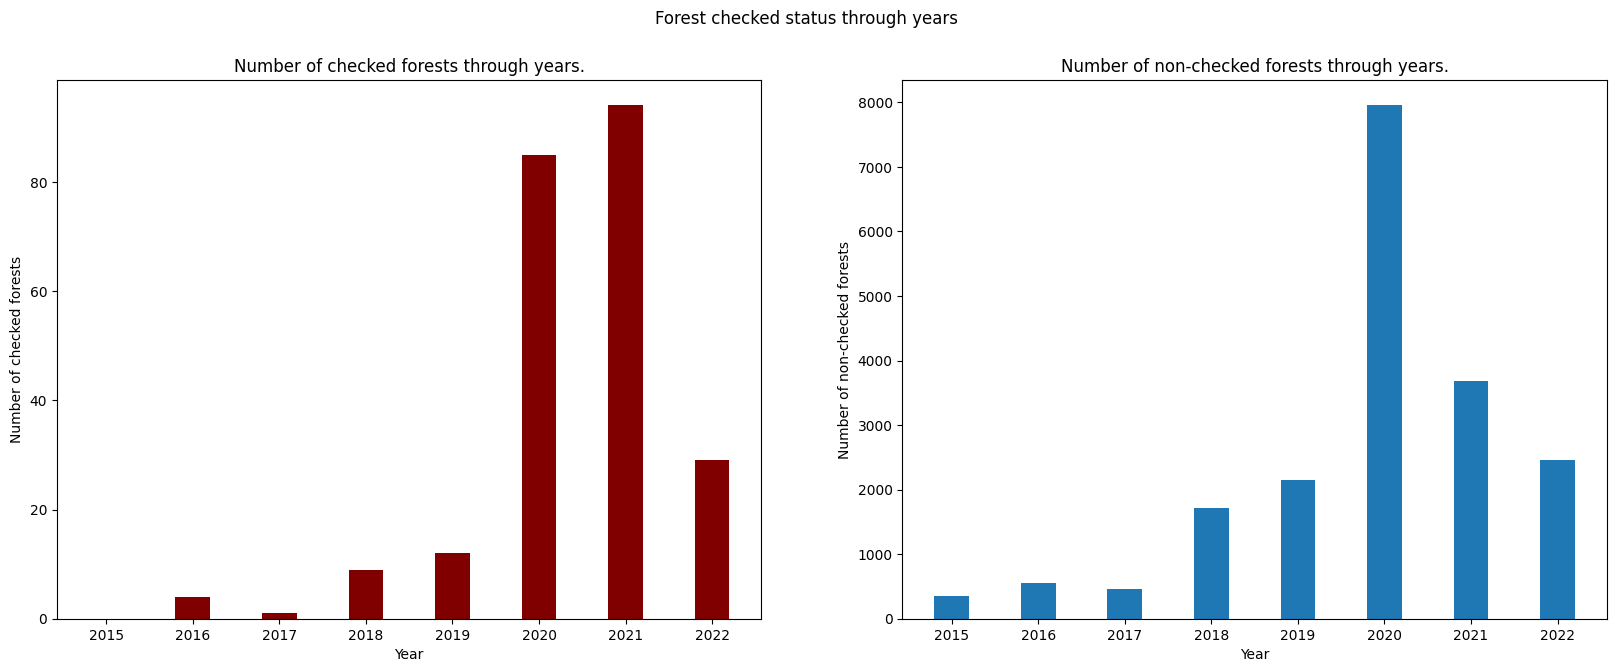

In [12]:
mycursor.execute("SELECT YEAR(NGÀY), TRẠNG_THÁI_KIỂM_TRA_THỰC_ĐỊA FROM VNForest ORDER BY YEAR(NGÀY) ASC")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

years = []
for index, row in df.iterrows():
    if row[0] not in years:
        years.append(row[0])

count_checked = [0] * years.__len__();
count_non_checked = [0] * years.__len__();
for index, row in df.iterrows():
    idx = years.index(row[0])
    if row[1] == 'Đã kiểm tra':
        count_checked[idx] += 1
    else:
        count_non_checked[idx] += 1

# Plot graph for 'Đã kiểm tra':
 
# creating the bar plot
fig = plt.figure(figsize =(20, 7))

ax = fig.add_subplot(1, 2, 1)
plt.bar(years, count_checked, color ='maroon',
        width = 0.4) 
plt.xlabel("Year")
plt.ylabel("Number of checked forests")
plt.title("Number of checked forests through years.")
# plt.show()

ax = fig.add_subplot(1, 2, 2)
plt.bar(years, count_non_checked,
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Number of non-checked forests")
plt.title("Number of non-checked forests through years.")

plt.suptitle("Forest checked status through years")
plt.show()

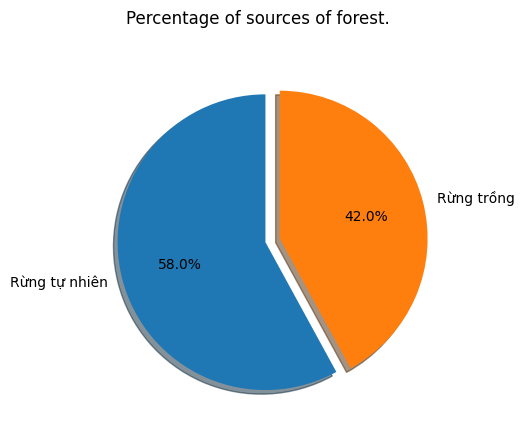

In [13]:
mycursor.execute("SELECT NGUỒN_GỐC FROM VNForest")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

dict = {}
for index, row in df.iterrows():
    if row[0] not in dict:
        dict[row[0]] = 1
    else:
        dict[row[0]] += 1

explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(dict.values(), explode=explode, labels=dict.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.suptitle("Percentage of sources of forest.")
plt.show()

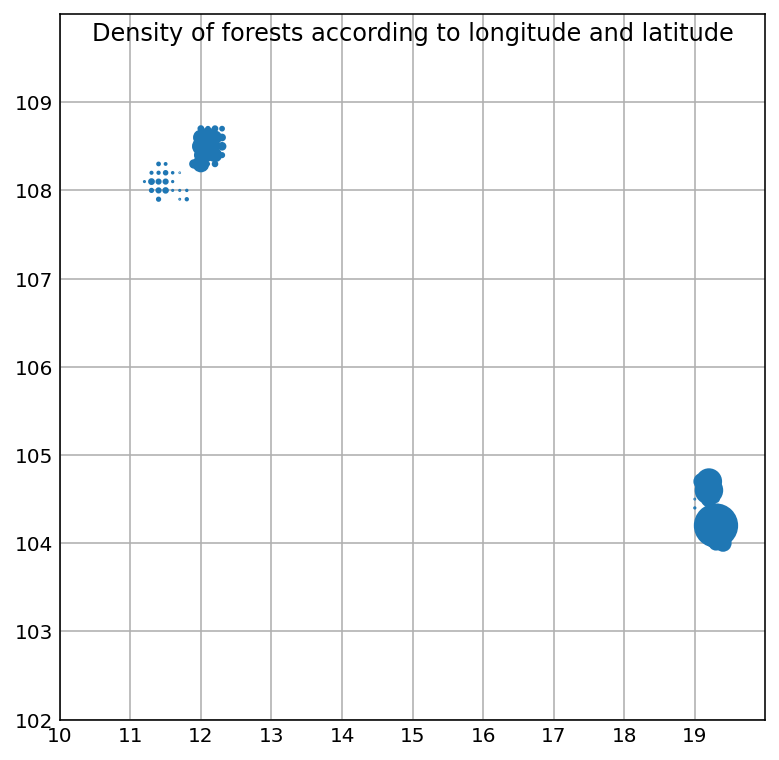

In [14]:
mycursor.execute("SELECT VĨ_ĐỘ, KINH_ĐỘ FROM VNForest")

# Fetch all the results
table_description = mycursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(table_description)

weight = [[0] * 1100 for _ in range(200)]
for index, row in df.iterrows():
    weight[int(round(row[0], 1) * 10)][int(round(row[1], 1) * 10)] += 1

x = []
y = []
sizes = []
for x_coor in range(200):
    for y_coor in range(1100):
        if weight[x_coor][y_coor] != 0:
            x.append(x_coor / 10.0)
            y.append(y_coor / 10.0)
            sizes.append(weight[x_coor][y_coor] / 10)


plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots(figsize=(5, 5), dpi=144)

ax.scatter(x, y, s=sizes)

ax.set(xlim=(10, 20), xticks=np.arange(10, 20),
       ylim=(102, 110), yticks=np.arange(102, 110))

plt.suptitle("Density of forests according to longitude and latitude")
plt.show()

### Closing Connection

Close the cursor and the connection.

In [15]:
mycursor.close()
mydb.close()